# Assignment 3, Part 1:
- ❌ Read in bike_share_hour.csv as a pandas dataframe. The columns are described in the bike_share_readme.txt if you need more information about them.
- ❌ Look at the dataset, and convert the columns that are categorical to a pandas “category” type.
- ❌Look for non-null values in the dataset.
- ❌Do a descriptive analysis of the numeric columns.
- ❌Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.
- ❌Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.
- ❌Implement a bar chart for month versus count. Document which months have the most bike rides.
- ❌Implement code to figure out which months belong to which seasons.
- ❌Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.
- ❌Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. Document how season and weathersit are related.
- ❌Implement a bar plot of hour versus count. Are there any specific hours that are busier than others?
- ❌Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0). Does the hourly trend change on weekends?

In [1]:
import pandas as pd
import numpy as np


bikeShareDF=pd.read_csv('bike_share_hour.csv')


In [2]:
bikeShareDF.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


~~Look at the dataset, and convert the columns that are categorical to a pandas “category” type.~~

categorical-year(because they set it here with 0 and 1)season, holiday, weekday, workingday, weathersit

In [3]:
# bikeShareDF.info()
bikeShareDF['yr']=bikeShareDF['yr'].astype('category')
bikeShareDF['hr']=bikeShareDF['hr'].astype('category')
bikeShareDF['mnth']=bikeShareDF['mnth'].astype('category')
bikeShareDF['holiday']=bikeShareDF['holiday'].astype('category')
bikeShareDF['weekday']=bikeShareDF['weekday'].astype('category')
bikeShareDF['workingday']=bikeShareDF['workingday'].astype('category')
bikeShareDF['weathersit']=bikeShareDF['weathersit'].astype('category')
bikeShareDF['season']=bikeShareDF['season'].astype('category')
bikeShareDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


~~Look for non-null values in the dataset.~~

In [4]:
print(bikeShareDF.isna().sum())
print(bikeShareDF.notnull().sum())
##Looks like there are no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64


~~Do a descriptive analysis of the numeric columns.~~

In [5]:
bikeShareDF.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


~~Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.~~

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_style("darkgrid")
sns.barplot(x="season", y="cnt", data=bikeShareDF)
# Season 1 has the least and season 3 has the most.

~~Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.~~

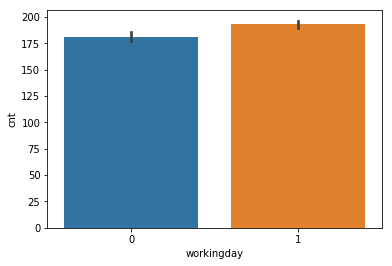

In [7]:
sns.barplot(x="workingday", y="cnt", data=bikeShareDF)
#It appears that working day has a slight edge on the amount of people using the bike share. 
#But overall closer than I would have thought

~~Implement a bar chart for month versus count. Document which months have the most bike rides.~~

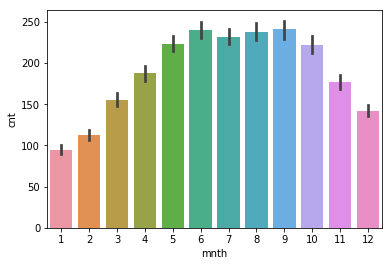

In [8]:
sns.barplot(x="mnth", y="cnt", data=bikeShareDF)
#Looks like September or June has the most. January has the least.

~~Implement code to figure out which months belong to which seasons.~~

In [9]:
print(bikeShareDF.groupby(['season'])['mnth'].value_counts())
print(bikeShareDF.groupby(['season'])['mnth'].unique())


season  mnth
1       1       1429
        2       1341
        3        949
        12       523
2       5       1488
        4       1437
        6        960
        3        524
3       7       1488
        8       1475
        9       1053
        6        480
4       10      1451
        11      1437
        12       960
        9        384
Name: mnth, dtype: int64
season
1    [1, 2, 3, 12]
Categories (4, int64): [1, 2, 3,...
2     [3, 4, 5, 6]
Categories (4, int64): [3, 4, 5, 6]
3     [6, 7, 8, 9]
Categories (4, int64): [6, 7, 8, 9]
4    [9, 10, 11, 12]
Categories (4, int64): [9, 10,...
Name: mnth, dtype: object


~~Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.~~

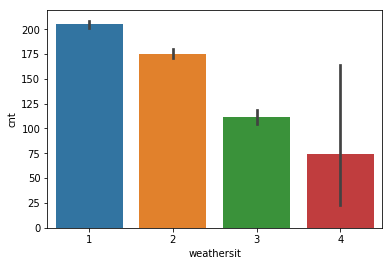

In [10]:
sns.barplot(x="weathersit", y="cnt", data=bikeShareDF)
#It looks like the weathersit 4 has the least bike rentals. While the error bar is significant here 
#it's overall count is less

In [11]:
# sns.countplot(x="weathersit", data=bikeShareDF)

~~Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. Document how season and weathersit are related.~~

In [12]:
# sns.catplot(x='weathersit', hue='season', kind='count', data=bikeShareDF)

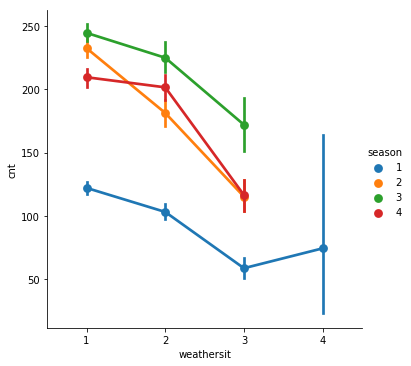

In [13]:
# sns.scatterplot(x='weathersit', y='cnt', hue='season', data=bikeShareDF)
sns.catplot(x='weathersit', y='cnt', hue='season', kind='point',data=bikeShareDF)
## It seems that season one gets to weathersit 4(the heaviest or worst). Also, that the counts of users went down
## as the weathersit increased in bad conditions. -With the odd exception of season 1 going up a little to 
## weathersit4 from weather3

~~Implement a bar plot of hour versus count. Are there any specific hours that are busier than others?~~

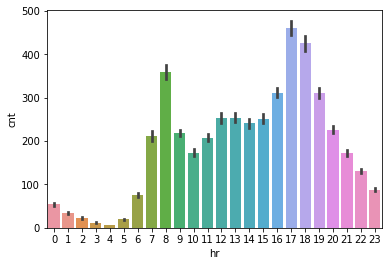

In [14]:
sns.barplot(x='hr', y='cnt', data=bikeShareDF)
## It appears that hours 8,5p(17) and 6p(18) are the busiest. Which would make sense
## if we are dealing with commuters. That is more users around the start of the work
## day and then at the end of an 8 hour shift.

~~Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0). Does the hourly trend change on weekends?~~

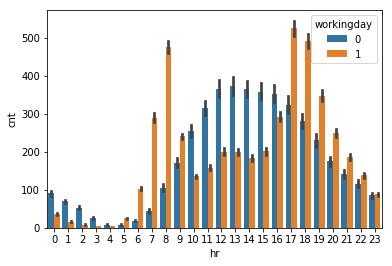

In [15]:
sns.barplot(x='hr', y='cnt',hue='workingday', data=bikeShareDF)
## Yes the hourly trend changes drastically between working days and not (holidays and weekends)
## The start and end of the work days are still spiking at 8, 5 and 6. But then for the 
## weekends, mid day hours are stronger. As if suggesting people sleep in or something
## then and go out to use the bikes midday.

# Assignment 4, Part 2: Data Preparation
- ❌Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?
- ❌Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.
- ❌Drop the following columns from your dataset: casual, registered, dteday, instant.
- ❌Implement a histogram of the count column. What can be said based on the resulting distribution?  
- ❌Implement a train/test split with a test size of 33%.
- ❓❌Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse. Document your scores.

~~Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?~~

In [16]:
corr_matrix = bikeShareDF.corr()
corr_matrix

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


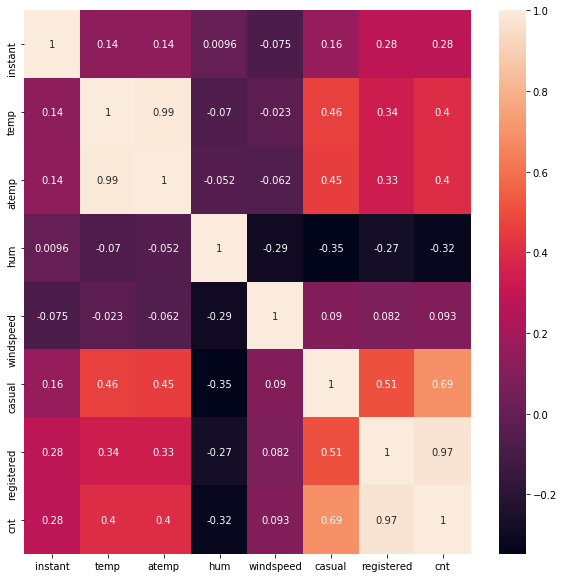

In [17]:
# corr_matrix = bikeShareDF.corr()
# corr_matrix
plt.figure(figsize=(10,10))
# fig, ax = plt.subplot
sns.heatmap(corr_matrix, annot=True)
# plt.show()
## The most correlated relationships look like registered to count (.97) and then casual
## users are next at .69. Of course the temp and atemp are very close but that seems 
## almost a given.
## Otherwise, I'm not seeing too many correlations. Most relationships are less than .5

Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# num_columns=bikeShareDF.columns[bikeShareDF.dtypes.apply(lambda x: np.issubdtype(x, np.number))]
##left out the 'cnt' as in some research it talked about not scaling the target variable.
num_columns=['temp','atemp','hum','windspeed','casual','registered']

# scaler.fit_transform(bikeShareDF)
bikeShareDF[num_columns] = scaler.fit_transform(bikeShareDF[num_columns])

bikeShareDF.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,-1.334648,-1.269602,0.636370,-0.821484,-0.723603,-1.009474,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.683038,-1.016081,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,-1.542385,-1.269602,1.206542,-1.553889,-0.703320,-1.002867,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.703320,-0.969832,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,-0.919172,-0.740638,0.688203,-1.553889,-0.561343,-0.976439,14


~~Drop the following columns from your dataset: casual, registered, dteday, instant.~~

In [19]:
bikeShareDF.drop(['casual', 'registered','instant','dteday'], axis = 1, inplace=True)
bikeShareDF.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,16
1,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,40
2,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,32
3,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,13
4,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,1
5,1,0,1,5,0,6,0,2,-1.334648,-1.269602,0.636370,-0.821484,1
6,1,0,1,6,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,2
7,1,0,1,7,0,6,0,1,-1.542385,-1.269602,1.206542,-1.553889,3
8,1,0,1,8,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,8
9,1,0,1,9,0,6,0,1,-0.919172,-0.740638,0.688203,-1.553889,14


Implement a histogram of the count column. What can be said based on the resulting distribution?


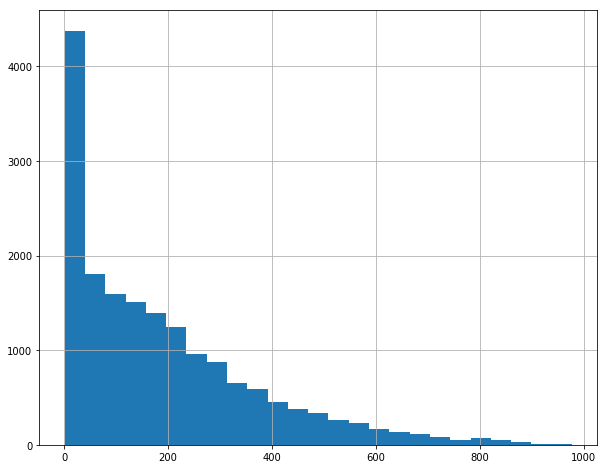

In [20]:
# sns.histplot(data=bikeShareDF, x='cnt')
bikeHist=bikeShareDF['cnt'].hist(bins=25, figsize=(10,8))
## The distribution here isn't a normal distribution. As the count goes higher the volume goes lower from a high value
## on the left. It drops almost exponentially. So that there are a large number of observations just to the left and
## larger than the mean which we saw above is about 189.

~~Implement a train/test split with a test size of 33%.~~


In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bikeShareDF, test_size=0.33, random_state=77)
print(len(train_set),"Train set")
print(len(test_set),"Test set")
print(sum([len(train_set),len(test_set)]),"Total of above; matches length above in info")

11643 Train set
5736 Test set
17379 Total of above; matches length above in info


Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse. Document your scores.
(In office hours reminder that cross-val (for lin reg) outputs r2 score default)

In [22]:
# train_set.head(5) #Count is still here and we'll need it removed.
train_Targ=train_set['cnt']
train_set.drop('cnt', axis=1, inplace=True)
test_Targ=test_set['cnt']
test_set.drop('cnt', axis=1, inplace=True)
print(train_set.head(5))
train_Targ[:5]

#from RJ r2 is default cross val score for regressors and different for others go to api default scoring:
# r2_scores = cross_val_score(lin_reg,X_train,y_train,cv=10)


      season yr mnth  hr holiday weekday workingday weathersit      temp  \
9124       1  1    1   2       0       6          0          3 -1.853992   
6188       3  0    9  10       0       2          1          3  0.327253   
2459       2  0    4   9       0       0          0          1 -0.503697   
8370       4  0   12  10       0       2          1          2 -0.399828   
16383      4  1   11   9       0       2          1          2 -0.711435   

          atemp       hum  windspeed  
9124  -1.534375  1.206542  -1.553889  
6188   0.317291  1.310209  -0.211691  
2459  -0.387995 -1.022312   0.764304  
8370  -0.300125 -0.244805   0.031899  
16383 -0.564316  0.429034  -1.553889  


/mnt/c/Users/User/Documents/pythonProjects/tool1/dst1_env/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


9124      26
6188      30
2459     102
8370     129
16383    326
Name: cnt, dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(train_set, train_Targ)
predictions=lr.predict(train_set)
# lr_mse=mean_squared_error(train_Targ, predictions)
# lr_rmse=np.sqrt(lr_mse)
scores_mse = cross_val_score(lr, train_set, train_Targ,
                        scoring="neg_mean_squared_error", cv=10)
print("mean MSE:", (-scores_mse).mean())
lr_rmse_scores=np.sqrt(-scores_mse)
print("Scores RMSE", lr_rmse_scores)
print("mean RMSE:", lr_rmse_scores.mean(),"/n")

scoresR2 = cross_val_score(lr, train_set,train_Targ,cv=10)

print("R2 Scores", scoresR2)
print("mean R2:", (scoresR2).mean())
print("R2 score function:", r2_score(train_Targ,predictions)) #didn't touch

print("--curious here with msefunct Targ v Predict", mean_squared_error(train_Targ,predictions))
print('checkingRMSE',np.sqrt(mean_squared_error(train_Targ,predictions)))
# print("std:", lr_rmse_scores.std())

### Was curious to see what the MSE and RMSE would be here. Also, curious to see how the R2 score
### would do between what the cross-val creates and the separate imported method.

mean MSE: 20198.53948824424
Scores RMSE [142.54668955 147.73396232 137.17535087 134.59846836 138.2723693
 144.40184608 148.90542106 143.51478858 138.53886718 144.82130384]
mean RMSE: 142.05090671263798 /n
R2 Scores [0.41162608 0.38383355 0.36912719 0.39357557 0.38742554 0.40584105
 0.375675   0.40684644 0.37175429 0.38281497]
mean R2: 0.38885196996237353
R2 score function: 0.39120101203347923
--curious here with msefunct Targ v Predict 20152.017746600097
checkingRMSE 141.9578026971399


# Assignment 4, Part 3: Model Training
- ❓ ❌Create one-hot-encoded values for your categorical columns using get_dummies, and add them to your source dataset.
- ❌Drop the original categorical columns from your source dataset.
- ❓ ❌Do a test/train split based on your new source dataset. Your new feature set should have 45 columns.
- ❌Implement and fit a new linear model on your new training set.
- ❌What are the new values for r2, mse, and rmse?
- ❌Implement and score a decision tree regressor with random_state=0.
- ❌Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30.
- ❌Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).
- ❌Implement and score a Lasso Regressor with alpha=0.1.
- ❌Implement and score an ElasticNet Regressor with random_state=0.
- ❌Implement and score a Ridge Regressor with alpha=0.5.
- ❓ ❌  Implement and score a BaggingRegressor.  Double check in daytime.
    - Hint: I did this with a for loop and added my results to a PrettyTable. 

Create one-hot-encoded values for your categorical columns using get_dummies, and add them to your source dataset.
Saw the 45 count on columns later in question and I have 28... Did I need to do hr and more of the time related columns as categorical.
~~Drop the original categorical columns from your source dataset.~~ (This seems to have just happened when you make the get-dummies call.) weathersit, year month day add in hours.

In [24]:
bikeShareDF.dtypes
## I remove yr, holiday and weekday as they aren't super needed. In class I think you removed  workingday I think?
## I left that in as we had used it earlier and I was concerned it would be needed again.
bikeShareDF.drop(['yr','holiday','weekday','workingday'], axis = 1, inplace=True)
bikeShareDF=pd.get_dummies(data=bikeShareDF)
print(bikeShareDF.head(5))
## As seen below in the info method we see that 
bikeShareDF.info()

       temp     atemp       hum  windspeed  cnt  season_1  season_2  season_3  \
0 -1.334648 -1.093281  0.947372  -1.553889   16         1         0         0   
1 -1.438516 -1.181732  0.895539  -1.553889   40         1         0         0   
2 -1.438516 -1.181732  0.895539  -1.553889   32         1         0         0   
3 -1.334648 -1.093281  0.636370  -1.553889   13         1         0         0   
4 -1.334648 -1.093281  0.636370  -1.553889    1         1         0         0   

   season_4  mnth_1  ...  hr_18  hr_19  hr_20  hr_21  hr_22  hr_23  \
0         0       1  ...      0      0      0      0      0      0   
1         0       1  ...      0      0      0      0      0      0   
2         0       1  ...      0      0      0      0      0      0   
3         0       1  ...      0      0      0      0      0      0   
4         0       1  ...      0      0      0      0      0      0   

   weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0             1             0   

❓ Do a test/train split based on your new source dataset. Your new feature set should have 45 columns. 

In [25]:
train_setPt3, test_setPt3 = train_test_split(bikeShareDF, test_size=0.33, random_state=77)

train_TargPt3=train_setPt3['cnt']
train_setPt3.drop('cnt', axis=1, inplace=True)
test_TargPt3=test_setPt3['cnt']
test_setPt3.drop('cnt', axis=1, inplace=True)

print(train_setPt3.head(5))

           temp     atemp       hum  windspeed  season_1  season_2  season_3  \
9124  -1.853992 -1.534375  1.206542  -1.553889         1         0         0   
6188   0.327253  0.317291  1.310209  -0.211691         0         0         1   
2459  -0.503697 -0.387995 -1.022312   0.764304         0         1         0   
8370  -0.399828 -0.300125 -0.244805   0.031899         0         0         0   
16383 -0.711435 -0.564316  0.429034  -1.553889         0         0         0   

       season_4  mnth_1  mnth_2  ...  hr_18  hr_19  hr_20  hr_21  hr_22  \
9124          0       1       0  ...      0      0      0      0      0   
6188          0       0       0  ...      0      0      0      0      0   
2459          0       0       0  ...      0      0      0      0      0   
8370          1       0       0  ...      0      0      0      0      0   
16383         1       0       0  ...      0      0      0      0      0   

       hr_23  weathersit_1  weathersit_2  weathersit_3  weathersit_4

/mnt/c/Users/User/Documents/pythonProjects/tool1/dst1_env/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
import joblib as joblib
joblib.dump(train_setPt3, "bikeFeaturesTrain.pkl")
joblib.dump(train_TargPt3, "bikeTargetLabTrain.pkl")

['bikeTargetLabTrain.pkl']

~~Implement and fit a new linear model on your new training set.What are the new values for r2, mse, and rmse?~~ Now below too.

In [27]:
lrPt3 = LinearRegression()
lrPt3.fit(train_setPt3, train_TargPt3)
predictionsPt3=lrPt3.predict(train_setPt3)
# lr_mse=mean_squared_error(train_Targ, predictions)
# lr_rmse=np.sqrt(lr_mse)
scoresPt3mse = cross_val_score(lrPt3, train_setPt3, train_TargPt3,
                        scoring="neg_mean_squared_error", cv=10)
scoresPt3_R2 = cross_val_score(lrPt3, train_setPt3, train_TargPt3, cv=10)
lrPt3_rmse_scores=np.sqrt(-scoresPt3mse)
print("ScoresR2", scoresPt3_R2)
print("MSE from crossVal:",scoresPt3mse)
print("R2 score from cross: ", scoresPt3_R2.mean())
print("R2 score from r2 func:", r2_score(train_TargPt3,predictionsPt3))
print("mean MSE:", (-scoresPt3mse).mean())
print("mean RMSE:", lrPt3_rmse_scores.mean())


ScoresR2 [0.67505633 0.63228246 0.60684802 0.63725347 0.59178871 0.65163689
 0.63438811 0.61947764 0.62871333 0.6399184 ]
MSE from crossVal: [-11221.96561976 -13024.97779871 -11726.56500805 -10836.94372346
 -12740.806823   -12225.73583062 -12984.66067683 -13213.14965084
 -11342.87346259 -12236.30955988]
R2 score from cross:  0.6317363371283126
R2 score from r2 func: 0.6356437194817787
mean MSE: 12155.398815372322
mean RMSE: 110.19154450801571


Implement and score a decision tree regressor with random_state=0  ❓❓❓ random_state in right place?

In [28]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor(random_state=0)
dtree_reg.fit(train_setPt3, train_TargPt3)
dtreePredictions=dtree_reg.predict(train_setPt3)#Couldn't do random state here.
dtree_mse=mean_squared_error(train_TargPt3, dtreePredictions)
dtreeRmse=np.sqrt(dtree_mse)
print("Decision Tree")
print("MSE:", dtree_mse)
print("RMSE:", dtreeRmse)
print("R2Score:",r2_score(train_TargPt3,dtreePredictions))

Decision Tree
MSE: 91.36834721864354
RMSE: 9.558679156590806
R2Score: 0.9972397326154465


~~Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30~~

In [29]:
from sklearn.ensemble import RandomForestRegressor

ranForest_reg=RandomForestRegressor(random_state=0, n_estimators=30)
ranForest_reg.fit(train_setPt3, train_TargPt3)
ranForest_regPredictions=ranForest_reg.predict(train_setPt3)
ranForest_regMse=mean_squared_error(train_TargPt3, ranForest_regPredictions)
ranForest_regRmsenp=np.sqrt(ranForest_regMse)
print("Random Tree")
print("MSE:", ranForest_regMse)
print("RMSE:", ranForest_regRmsenp)
print("R2Score:", r2_score(train_TargPt3,ranForest_regPredictions)) 

Random Tree
MSE: 1730.584255000324
RMSE: 41.60029152542472
R2Score: 0.9477184887248948


~~Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).~~

In [30]:
from sklearn.linear_model import SGDRegressor

sgdReg=SGDRegressor(max_iter=1000, tol=1e-3)
sgdReg.fit(train_setPt3, train_TargPt3)
sgdPredictions=sgdReg.predict(train_setPt3)
sgdReg_MSE=mean_squared_error(train_TargPt3,sgdPredictions)
sgdReg_Rmse=np.sqrt(sgdReg_MSE)
print("SGD Regressor")
print("MSE:", sgdReg_MSE)
print("RMSE:", sgdReg_Rmse)
print("R2Score:", r2_score(train_TargPt3, sgdPredictions))

SGD Regressor
MSE: 12082.678853355408
RMSE: 109.92123931868403
R2Score: 0.6349783555004911


~~Implement and score a Lasso Regressor with alpha=0.1.~~

In [31]:
from sklearn.linear_model import Lasso

lassoReg=Lasso(alpha=0.1)
lassoReg.fit(train_setPt3, train_TargPt3)
lassoPredictions=lassoReg.predict(train_setPt3)
lasso_MSE=mean_squared_error(train_TargPt3, lassoPredictions)
lasso_RMSE=np.sqrt(lasso_MSE)
print("Lasso Regressor")
print("MSE:", lasso_MSE)
print("RMSE:", lasso_RMSE)
print("R2Score:", r2_score(train_TargPt3, lassoPredictions))

Lasso Regressor
MSE: 12071.896583733977
RMSE: 109.87218293878563
R2Score: 0.6353040913605946


~~Implement and score an ElasticNet Regressor with random_state=0.~~

In [32]:
from sklearn.linear_model import ElasticNet

elastNetReg=ElasticNet(random_state=0)
elastNetReg.fit(train_setPt3, train_TargPt3)
elastPredictions=elastNetReg.predict(train_setPt3)
elast_MSE=mean_squared_error(train_TargPt3,elastPredictions)
elast_RMSE=np.sqrt(elast_MSE)
print("ElasticNet Regressor")
print("MSE:", elast_MSE)
print("RMSE:", elast_RMSE)
print("R2Score:", r2_score(train_TargPt3, elastPredictions))

ElasticNet Regressor
MSE: 23171.64176769831
RMSE: 152.22234319474362
R2Score: 0.29997719161013014


~~Implement and score a Ridge Regressor with alpha=0.5.~~

In [33]:
from sklearn.linear_model import Ridge

ridgeReg=Ridge(alpha=0.5)
ridgeReg.fit(train_setPt3, train_TargPt3)
ridgePredictions=ridgeReg.predict(train_setPt3)
ridge_MSE=mean_squared_error(train_TargPt3, ridgePredictions)
ridge_RMSE=np.sqrt(ridge_MSE)
print("Ridge Regressor")
print("MSE:", ridge_MSE)
print("RMSE:", ridge_RMSE)
print("R2Score:", r2_score(train_TargPt3, ridgePredictions))

Ridge Regressor
MSE: 12060.672233977026
RMSE: 109.82109193582545
R2Score: 0.635643182604883


Implement and score a BaggingRegressor. Decision tree is default so we stuck with that.

In [34]:
from sklearn.ensemble import BaggingRegressor
bagReg=BaggingRegressor()
bagReg.fit(train_setPt3, train_TargPt3)
bagPredicts=bagReg.predict(train_setPt3)
bag_MSE=mean_squared_error(train_TargPt3, ridgePredictions)
bag_RMSE=np.sqrt(bag_MSE)
print("Bagging Regressor")
print("MSE:", bag_MSE)
print("RMSE:", bag_RMSE)
print("R2Score:", r2_score(train_TargPt3, bagPredicts))


Bagging Regressor
MSE: 12060.672233977026
RMSE: 109.82109193582545
R2Score: 0.9378435451280962


In [35]:
# !pip3 install PrettyTable
from prettytable import PrettyTable
prettyTab=PrettyTable()
prettyTab.field_names = ["Base Model/Est", "MSE", "RMSE", "R2"]
#FROM above just bringing together here:
prettyTab.add_row([lrPt3.__class__.__name__, (-scoresPt3mse).mean(),lrPt3_rmse_scores.mean(), scoresPt3_R2.mean()])
prettyTab.add_row(["Decision Tree", dtree_mse, dtreeRmse, r2_score(train_TargPt3,dtreePredictions)])
prettyTab.add_row(["Random Forest",ranForest_regMse, ranForest_regRmsenp, r2_score(train_TargPt3,ranForest_regPredictions)])
prettyTab.add_row(["SGD Regressor",sgdReg_MSE,sgdReg_Rmse, r2_score(train_TargPt3, sgdPredictions)])
prettyTab.add_row(["Lasso Regressor", lasso_MSE, lasso_RMSE, r2_score(train_TargPt3, lassoPredictions)])
prettyTab.add_row(["ElasticNet Regressor", elast_MSE, elast_RMSE,  r2_score(train_TargPt3, elastPredictions)])
prettyTab.add_row(["Ridge Regressor", ridge_MSE, ridge_RMSE, r2_score(train_TargPt3, ridgePredictions)])
prettyTab.add_row(["Bagging Regressor", bag_MSE, bag_RMSE, r2_score(train_TargPt3, bagPredicts)])
print(prettyTab)

+----------------------+--------------------+--------------------+---------------------+
|    Base Model/Est    |        MSE         |        RMSE        |          R2         |
+----------------------+--------------------+--------------------+---------------------+
|   LinearRegression   | 12155.398815372322 | 110.19154450801571 |  0.6317363371283126 |
|    Decision Tree     | 91.36834721864354  | 9.558679156590806  |  0.9972397326154465 |
|    Random Forest     | 1730.584255000324  | 41.60029152542472  |  0.9477184887248948 |
|    SGD Regressor     | 12082.678853355408 | 109.92123931868403 |  0.6349783555004911 |
|   Lasso Regressor    | 12071.896583733977 | 109.87218293878563 |  0.6353040913605946 |
| ElasticNet Regressor | 23171.64176769831  | 152.22234319474362 | 0.29997719161013014 |
|   Ridge Regressor    | 12060.672233977026 | 109.82109193582545 |  0.635643182604883  |
|  Bagging Regressor   | 12060.672233977026 | 109.82109193582545 |  0.9378435451280962 |
+--------------------

# Assignment 4, Part 4: Model Tuning
- ❌o Take the top three performing models and implement cross-validation on them.
- ▪ Hint: They should be Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor.
- ❌o Take your top performing model (mine was the RandomForestRegressor) and do a randomize search cv with 20 iterations and three folds.
- ▪❌ I found it is best to set your n_jobs = (# of cpu’s you have – 1). This took about 10 minutes on my MacBook with 4 CPUs and 8 GB of memory.
- ▪ Your param distributions should include the following:
- ● Bootstrap: true, false
- ● Max_depth: 10-110, number of bins 11
- ● Max_features: auto, sqrt
- ● Min_samples_split: 2,5,10
- ● Min_samples_leaf: 1,2,4
- ● 200 – 2000, number of bins 10
- o Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.
- Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.

 ~~Take the top three performing models and implement cross-validation on them.~~

In [36]:
##Need to take top three and do cross val on them:  Decision Tree Random Tree Bagging Regressor  

#Decision Tree
decTreeScores=cross_val_score(dtree_reg, train_setPt3, train_TargPt3, cv=10)
decTreeScoresWscoring=cross_val_score(dtree_reg, train_setPt3, train_TargPt3, scoring="r2", cv=10)
# decTreeScoresWscoringMSE=cross_val_score(dtree_reg, train_setPt3, train_TargPt3, scoring="neg_mean_squared_error", cv=10)
# print(decTreeScores)
decTreeScore=decTreeScores.mean()
print("Decision Tree Cross Val score:",decTreeScore)

##Double check online research the diff on this scoring try to find or ask Prof where that API was for scoring info.
print(decTreeScoresWscoring.mean())
# print(decTreeScoresWscoringMSE)

randoForScores=cross_val_score(ranForest_reg, train_setPt3, train_TargPt3, cv=10)
# print(randoForScores)
randoScore=randoForScores.mean()
print("Random Forest Cross Val score:",randoScore)
# randoForScoresR2=cross_val_score(ranForest_reg, train_setPt3, train_TargPt3, scoring="r2", cv=10)
# randoForScoresMSE=cross_val_score(ranForest_reg, train_setPt3, train_TargPt3, scoring="neg_mean_squared_error",  cv=10)
# print(randoForScoresR2)
# print(randoForScoresMSE)

bagForScores=cross_val_score(bagReg, train_setPt3, train_TargPt3, cv=10)
# print(bagForScores)
bagScore=bagForScores.mean()
print("Bagging Cross Val score:", bagScore)

Decision Tree Cross Val score: 0.40965310810116995
0.40965310810116995
Random Forest Cross Val score: 0.6674083635875225
Bagging Cross Val score: 0.6517818752235671


❌Take your top performing model (mine was the RandomForestRegressor) and do a randomize search cv with 20 iterations and three folds.
- ❌▪ I found it is best to set your n_jobs = (# of cpu’s you have – 1). This took about 10 minutes on my MacBook with 4 CPUs and 8 GB of memory.
- ▪ Your param distributions should include the following:
- ● Bootstrap: true, false
- ● Max_depth: 10-110, number of bins 11
- ● Max_features: auto, sqrt
- ● Min_samples_split: 2,5,10
- ● Min_samples_leaf: 1,2,4
- ●❌ 200 – 2000, number of bins 10  ### from class he said this is the n_estimators.

In [37]:
from sklearn.model_selection import RandomizedSearchCV

#My best score from the cross val was also Random Forest
param_distributions={'bootstrap':[True, False],
                     #'max_depth':[10-110], #number of bins 11
                     'max_depth':[int(maxD) for maxD in np.linspace(start = 10, stop = 110, num=11)],
                     'max_features':['auto', 'sqrt'],
                     'min_samples_split':[2,5,10],
                     'min_samples_leaf':[1,2,4],
                     'n_estimators':[int(e) for e in np.linspace(start=200, stop=2000, num=10)]
                    }
                    
rndSearch_CV=RandomizedSearchCV(ranForest_reg, param_distributions, n_iter=20, cv=3, n_jobs=-1, random_state=77)
rndSearch_CV.fit(train_setPt3, train_TargPt3) 

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=30,
                                                   random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=77)

In [38]:
print(rndSearch_CV.best_params_)
bestSearchedModel=rndSearch_CV.best_estimator_

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


- o Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.
- Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.

In [39]:
bestEst_crossScoresR2=cross_val_score(bestSearchedModel, train_setPt3, train_TargPt3, cv=10)
bestEst_crossScoresMSE=cross_val_score(bestSearchedModel, train_setPt3, train_TargPt3, scoring="neg_mean_squared_error", cv=10)
bestEs_rmse_scores=np.sqrt(-bestEst_crossScoresMSE)

print("Best Est R2 score", bestEst_crossScoresR2.mean())
print("Best Est MSE score", -(bestEst_crossScoresMSE.mean()))
print("Best Est RMSE score",bestEs_rmse_scores.mean())

predictionsTEST=bestSearchedModel.predict(test_setPt3)
# test_TargPt3
# test_setPt3
R2onTest=r2_score(test_TargPt3,predictionsTEST)
MSEonTest=mean_squared_error(test_TargPt3,predictionsTEST)
RMSEonTest=np.sqrt(MSEonTest)

#Now the test sets Scores from the predictions:
print("Test Set R2 score", R2onTest)
print("Test Set MSE score", MSEonTest)
print("Test Set RMSE score",RMSEonTest)

Best Est R2 score 0.6933459076468317
Best Est MSE score 10128.577799296207
Best Est RMSE score 100.55268991136505
Test Set R2 score 0.6864533402367172
Test Set MSE score 10182.45639349457
Test Set RMSE score 100.9081582107937
